In [ ]:
# IS 362 Assignment 12 - Moises Perez

Tasks:
• First study the dataset and the associated description of the data (i.e. “data dictionary”). You may need to look around a bit, but it’s there!
• Create a pandas DataFrame with a subset of the columns in the dataset. You should include the column that indicates edible or poisonous, the column that includes odor, and at least one other column of your choosing.
• Add meaningful names for each column.
• Replace the codes used in the data with numeric values—for example, in the first “target” column, “e” might become 0 and “p” might become 1. This is because your downstream processing in Project 4 using scikit-learn requires that values be stored as numerics.
• Perform exploratory data analysis: show the distribution of data for each of the columns you selected, and show scatterplots for edible/poisonous vs. odor as well as the other column that you selected.
• Include some text describing your preliminary conclusions about whether either of the other columns could be helpful in predicting if a specific mushroom is edible or poisonous.

In [7]:
# Importing modules
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

Attribute Information:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

In [10]:
#Reading CSV and converting to dataframe
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data', 
                  sep = ',', 
                  header = None, 
                  usecols = [0,3,5], 
                  names = ["Mushroom_Class", "Cap_Color", "Odor"])
data.head(5)

,Mushroom_Class,Cap_Color,Odor
0,p,n,p
1,e,y,a
2,e,w,l
3,p,w,p
4,e,g,n


In [11]:
# Converting data to numeric values
data.replace(to_replace={"Mushroom_Class":{'p':1, 'e':0}}, inplace = True)
data.replace(to_replace={"Cap_Color":{'n':0, 'b':1, 'c':2, 'g':3, 'r':4, 'p':5, 'u':6, 'e':7, 'w':8, 'y':9}}, inplace=True)
data.replace(to_replace={"Odor":{'a':0, 'l':1, 'c':2, 'y':3, 'f':4, 'm':5, 'n':6, 'p':7, 's':8}}, inplace=True)
data.head(5)

,Mushroom_Class,Cap_Color,Odor
0,1,0,7
1,0,9,0
2,0,8,1
3,1,8,7
4,0,3,6


In [12]:
count = data['Mushroom_Class'].value_counts()
count

0    4208
1    3916
Name: Mushroom_Class, dtype: int64

Text(0, 0.5, 'Cap Color')

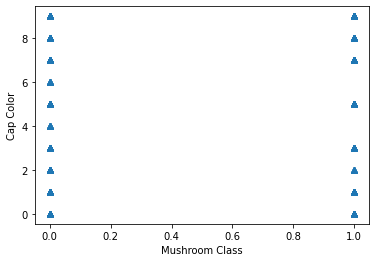

In [13]:
plt.scatter(data.Mushroom_Class, data.Cap_Color, marker = '^')
plt.xlabel("Mushroom Class")
plt.ylabel("Cap Color")

Text(0, 0.5, 'Odor')

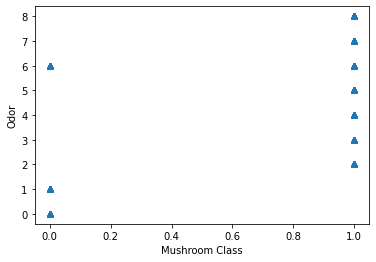

In [14]:
# Mushroom class 0=edible 1=Poisonous. Cap color 4 and 6 is not poisonus so red and purple are edible.
plt.scatter(data.Mushroom_Class, data.Odor, marker = '^')
plt.xlabel("Mushroom Class")
plt.ylabel("Odor")

In [15]:
# the last plot shows that odor Anise(1), Almont(0) and Musty(6) are edible. but musty could also be poisonous 